In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
from torchmultimodal.models.flava.model import flava_model_for_classification, flava_model_for_pretraining

In [41]:
from torchvision.transforms import ToPILImage
from transformers import BertTokenizer

tokernizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [19]:
import os
import sys
import matplotlib.pyplot as plt

In [4]:
sys.path.append("../..")

In [5]:
a = torch.load("flava-epoch=00-step=21000.ckpt", map_location=torch.device('cpu'))

In [25]:
from flava.model import FLAVAPreTrainingLightningModule
from flava.data.datamodules import ISICDataset
from flava.data.transforms import default_image_pretraining_transforms

In [7]:
m = FLAVAPreTrainingLightningModule()

In [8]:
m.load_state_dict(a['state_dict'])

<All keys matched successfully>

In [42]:
ds = ISICDataset("/home/ravi/Documents/courses/healthcare/Research/test_data.csv",
                 "/home/ravi/Documents/courses/healthcare/Research/archive/train",
                 "image",
                  True)
tfms = default_image_pretraining_transforms()[1]
ds.set_transform(tfms)
dl = torch.utils.data.DataLoader(
            ds,
            batch_size=1,
            num_workers=1,
            sampler=None,
            shuffle=False,
            # collate_fn=_build_collator(),
            # uneven batches can cause distributed issues,
            # drop last batch to prevent those.
            drop_last=False,
        )
to_pil = ToPILImage()

In [43]:
im_ = ds[0]['image']

In [52]:
for data in dl:
    r = m._step(data, 1)
    break

In [72]:
m.model.model.image_encoder(data['image']).last_hidden_state[:, 0].squeeze()

torch.Size([768])

In [73]:
data.keys()

dict_keys(['label', 'image', 'img_pth', 'image_for_codebook', 'image_patches_mask'])

In [75]:
data['label'], data['img_pth']

(tensor([1]),
 ['/home/ravi/Documents/courses/healthcare/Research/archive/train/ISIC_0000002.jpg'])

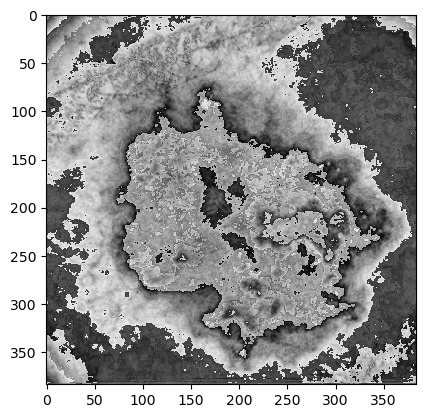

In [28]:
plt.imshow(to_pil(im_).convert('L'), cmap="gray")

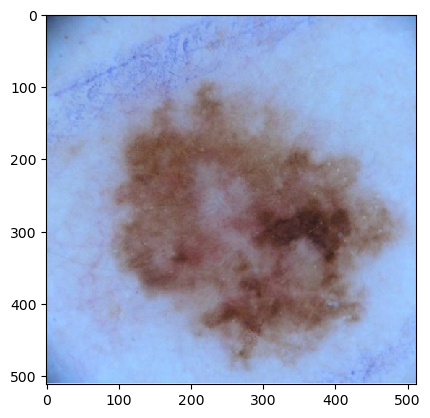

In [31]:
plt.imshow(plt.imread(ds[0]['img_pth']))